# Principal Component Analysis

# Example of loading MNIST dataset

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [2]:
mnist_train = pd.read_csv('/home/parth/AppliedAI/datasets/mnist/train.csv')
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
n,d = mnist_train.shape
print('mnist_train = {} X {}'.format(n,d))

mnist_train = 42000 X 785


Seperating the label from the actual dataframe

In [4]:
label_train = mnist_train['label']
mnist_train.drop(labels=['label'],axis=1,inplace=True)
mnist_train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plotting the data

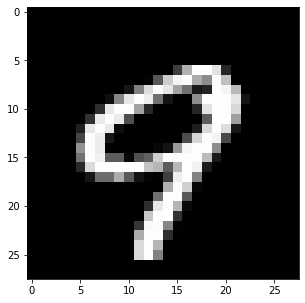

9


In [5]:
index = 100

img = mnist_train.iloc[index].values.reshape(28,28)
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.show()

print(label_train[index])

# Applying PCA on the MNIST dataset

## Method 1

Using math that we know

### Imports

In [6]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns

__Converting the data matrix to Column Standardized using Standard Scaler__

In [7]:
standard_scaler = StandardScaler()
mnist_std_data = standard_scaler.fit_transform(mnist_train)
mnist_std_data.shape

(42000, 784)

__Calculating the covariance matrix of the mnist_std_data__

In [8]:
mnist_std_cov = (1/n) * (np.matmul(mnist_std_data.T,mnist_std_data))
print(mnist_std_cov.shape)

(784, 784)


__Calculating the Eigen Values and Eigen Vectors of mnsit_std_data and taking only the required two vectors__

In [9]:
eigen_values , eigen_vectors = eigh(mnist_std_cov,eigvals=(782,783))
print(eigen_vectors.shape)

(784, 2)


In [10]:
final_data = np.matmul(eigen_vectors.T,mnist_std_data.T)
print('{} X {} = {}'.format(mnist_std_data.shape,eigen_vectors.shape,final_data.shape))


(42000, 784) X (784, 2) = (2, 42000)


In [11]:
coordiantes = np.vstack((final_data,label_train)).T

In [12]:
df = pd.DataFrame(coordiantes,columns=['v1','v2','label'])
df.head()

,v1,v2,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


<Figure size 432x288 with 0 Axes>

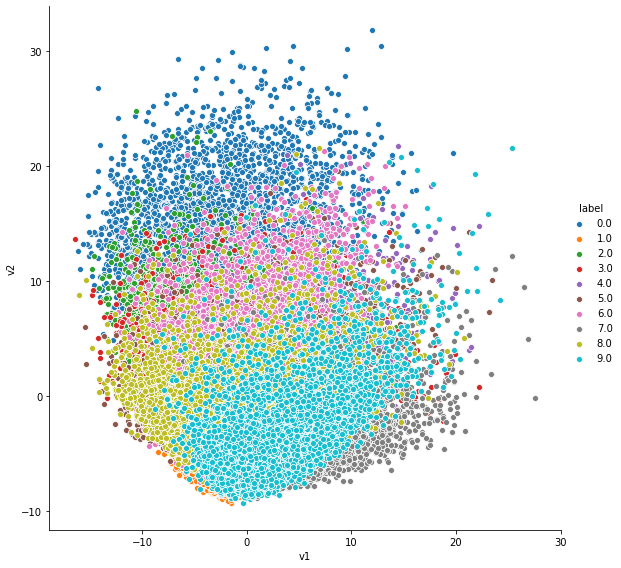

In [13]:
plt.figure()
sns.FacetGrid(df,hue='label',height=8).map(sns.scatterplot,'v1','v2').add_legend()
plt.show()

## Method 2

__Using sklearn__

### Imports

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
final_data = pca.fit_transform(mnist_train)

In [16]:
final_data.shape

(42000, 2)

In [17]:
df_m2 = pd.DataFrame(np.vstack((final_data.T,label_train)).T,columns=['v1','v2','label'])
df_m2.head()

,v1,v2,label
0,-661.594760,-699.311544,1.0
1,1701.452857,-360.546933,0.0
2,-886.894437,-293.758502,1.0
3,-165.754865,300.178323,4.0
4,1923.710524,-449.158728,0.0


<Figure size 432x288 with 0 Axes>

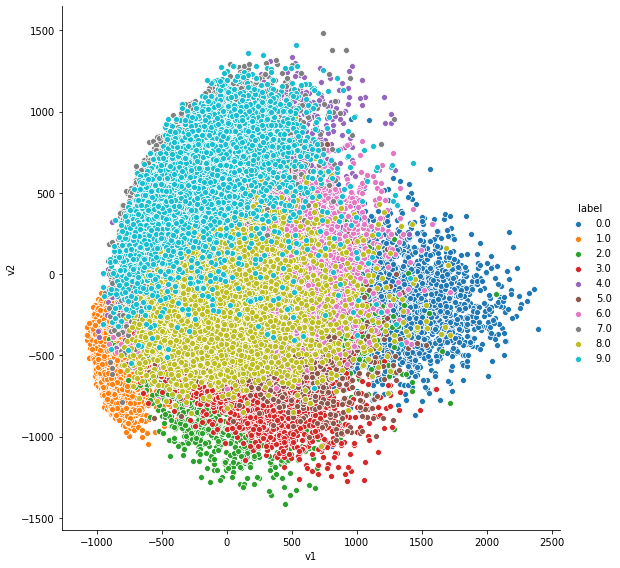

In [18]:
plt.figure()
sns.FacetGrid(df_m2,hue='label',height=8).map(sns.scatterplot,'v1','v2').add_legend()
plt.show()

# PCA for Dimensionlaity Reduction

In [19]:
pca = PCA()
final_data = pca.fit_transform(mnist_train)

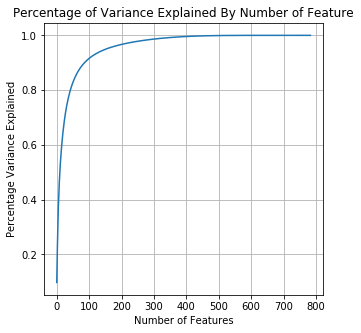

In [20]:
var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cummulative_variance = np.cumsum(var_explained)

plt.figure(figsize=(5,5))
plt.plot(cummulative_variance)
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Percentage Variance Explained')
plt.title('Percentage of Variance Explained By Number of Feature')
plt.show()